### This Notebook contains an example that shows how to use the Camera_Calibration_API to calibrate using a chessboard pattern

In [1]:
import sys
sys.path.append("../../")
from camera_calibration import Camera_Calibration_API
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(Camera_Calibration_API.__doc__)

 A complete API to calibrate camera with chessboard or symmetric_circles or asymmetric_circles.
        also runs on multi-threads
    
    Constructor keyword arguments:
    pattern_type --str: One of ['chessboard','symmetric_circles,'asymmetric_circles','custom'] (No default)
    pattern_rows --int: Number of pattern points along row (No default)
    pattern_columns --int: Number of pattern points along column (No default)
    distance_in_world_units --float: The distance between pattern points in any world unit. (Default 1.0)
    figsize: To set the figure size of the matplotlib.pyplot (Default (8,8))
    debug_dir --str: Optional path to a directory to save the images  (Default None)
                                 The images include : 
                                 1.Points visulized on the calibration board
                                 2.Reprojection error plot
                                 3.Pattern centric and camera centric views of the calibration board
    term_cr

In [3]:
images_path_list = glob.glob("../example_images/chessboard/*.jpg")
print(len(images_path_list))

13


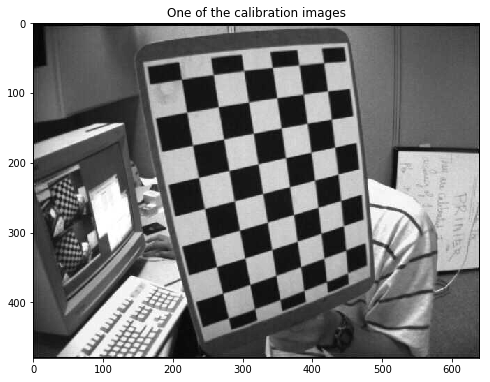

(480, 640)


In [4]:
# visualize one of the calibration images
test_img = cv2.imread(images_path_list[0],0)
plt.figure(figsize=(8,8))
plt.imshow(test_img,cmap="gray")
plt.title("One of the calibration images")
plt.show()
print(test_img.shape)

In [5]:
# initialize the constructor
# optionally supply path to debug directory to save the visualized images.
# if the given debug directory doesn't exists in the path it creates the given directory
chessboard = Camera_Calibration_API(pattern_type="chessboard",
                                    pattern_rows=7,
                                    pattern_columns=6,
                                    distance_in_world_units = 10 #lets assume the each square is 10 in some world units
                                   )

The Camera Calibration API is initialized and ready for calibration...


In [6]:
print(chessboard.calibrate_camera.__doc__)

 User facing method to calibrate the camera
        
        Keyword arguments
        
        images_path_list: A list containing full paths to calibration images (No default)
        threads --int: Number of threads to run the calibration (Default 4)
        custom_world_points_function --function: Must be given if pattern_type="custom", else leave at default (Default None)
        custom_image_points_function --function: Must be given if the patter_type="custom", else leave at default (Default None)
        
        A Note on custom_world_points_function() and custom_image_points_function()
        
        * custom_world_points_function(pattern_rows,pattern_columns):
            
        1) This function is responsible for calculating the 3-D world points of the given custom calibration pattern.
        2) Should take in two keyword arguments in the following order: Number of rows in pattern(int), Number of columns in pattern(int)
        3) Must return only a single numpy array o

There are 13 chessboard images given for calibration
Running with 4 threads...
Processing ../example_images/chessboard/left02.jpgProcessing ../example_images/chessboard/left01.jpg

Processing ../example_images/chessboard/left04.jpg
Processing ../example_images/chessboard/left03.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left05.jpgCalibration board FOUND
Calibration board FOUND
Processing ../example_images/chessboard/left06.jpg
Processing ../example_images/chessboard/left07.jpg

Calibration board FOUND
Calibration board FOUND
Processing ../example_images/chessboard/left08.jpgProcessing ../example_images/chessboard/left09.jpg

Calibration board FOUND
Processing ../example_images/chessboard/left11.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left12.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left13.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left14.jpg
Calibration board FOUND
Calibration board 

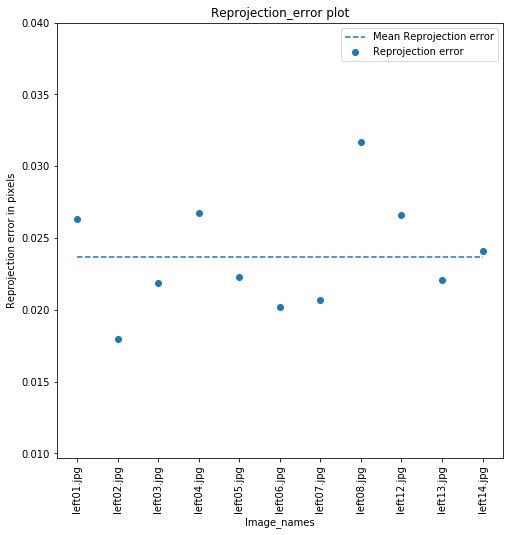

The Mean Reprojection Error in pixels is:  0.023685996975391924
CPU times: user 1.98 s, sys: 1.09 s, total: 3.07 s
Wall time: 1.53 s


In [7]:
%%time
Results = chessboard.calibrate_camera(images_path_list)

### The instance contains a useful instance variable called as calibration_df which contains all the details of the calibration for each image

In [8]:
chessboard.calibration_df

,image_names,img_points,obj_points,rvecs,tvecs,reprojection_error
0,../example_images/chessboard/left01.jpg,"[[[477.623, 86.2219]], [[478.011, 122.238]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.3474373889], [0.0890065010277], [1.5686090...","[[37.4677531478], [-40.3369413134], [140.42936...",0.026341
1,../example_images/chessboard/left02.jpg,"[[[456.984, 352.434]], [[416.431, 344.544]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.230661784143], [1.02458335928], [-2.79265...","[[27.5414344148], [28.4564089686], [123.633162...",0.017964
2,../example_images/chessboard/left03.jpg,"[[[562.362, 153.605]], [[552.414, 193.253]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.0759043054868], [0.386960511457], [1.9081...","[[48.7046512127], [-17.5186507917], [110.84111...",0.021867
3,../example_images/chessboard/left04.jpg,"[[[470.294, 110.21]], [[472.392, 153.324]], [[...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.0990178783177], [0.279883587659], [1.55791...","[[28.7920585328], [-27.4323239712], [115.28611...",0.026722
4,../example_images/chessboard/left05.jpg,"[[[542.389, 313.812]], [[491.839, 327.824]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.130690576123], [0.694211680782], [2.831321...","[[37.159383925], [14.93867986], [93.9737429973]]",0.022284
5,../example_images/chessboard/left06.jpg,"[[[556.808, 388.788]], [[522.706, 382.655]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.674281778752], [0.0900121700143], [-2.957...","[[60.8323987095], [43.9615523205], [139.773833...",0.020177
6,../example_images/chessboard/left07.jpg,"[[[292.148, 365.206]], [[262.534, 352.558]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.45307118581], [-0.151494048981], [-2.7885...","[[-14.3514673149], [38.2734260627], [151.56074...",0.020714
7,../example_images/chessboard/left08.jpg,"[[[415.09, 380.648]], [[367.163, 370.416]], [[...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.35479034796], [-0.524335491255], [-2.8643...","[[14.6828618851], [29.5283769487], [103.755114...",0.031696
8,../example_images/chessboard/left12.jpg,"[[[447.223, 357.646]], [[396.837, 359.573]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.108533732821], [0.589098562465], [3.064395...","[[20.8714218676], [24.6088612039], [102.539932...",0.026628
9,../example_images/chessboard/left13.jpg,"[[[466.572, 313.354]], [[432.257, 321.657]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.170975691905], [-0.704140172724], [2.75432...","[[35.2745066028], [22.6750019306], [147.472726...",0.022081


### you want to remove the images with high reprojection errors and recalibrate?

As an example lets remove the images with reprojection error > 0.3 and recalibrate

In [9]:
refined_images_paths = [img_path for i,img_path in enumerate(chessboard.calibration_df.image_names) if chessboard.calibration_df.reprojection_error[i] < 0.03]

In [10]:
# create another instance
refined_chessboard = Camera_Calibration_API(pattern_type="chessboard",
                                    pattern_rows=7,
                                    pattern_columns=6,
                                    distance_in_world_units = 10) #lets assume the each square is 10 in some world units

The Camera Calibration API is initialized and ready for calibration...


There are 10 chessboard images given for calibration
Running with 4 threads...
Processing ../example_images/chessboard/left01.jpgProcessing ../example_images/chessboard/left03.jpgProcessing ../example_images/chessboard/left02.jpgProcessing ../example_images/chessboard/left04.jpg



Calibration board FOUND
Calibration board FOUNDProcessing ../example_images/chessboard/left05.jpg

Processing ../example_images/chessboard/left06.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left07.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left12.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left13.jpg
Calibration board FOUND
Processing ../example_images/chessboard/left14.jpg
Calibration board FOUND
Calibration board FOUND
Calibration board FOUND
Calibration board FOUND

RMS: 0.1490723743108263
camera matrix:
 [[ 533.93162827    0.          340.57452614]
 [   0.          533.93274273  232.26222773]
 [   0.            0.            1.     

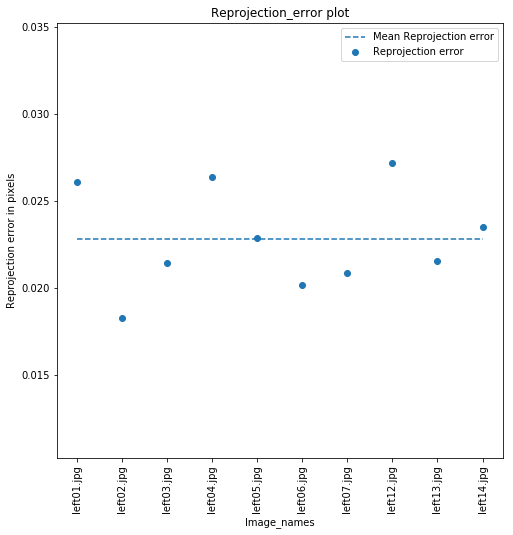

The Mean Reprojection Error in pixels is:  0.02283308692368901


In [11]:
# pass this new list of image_paths
refined_results = refined_chessboard.calibrate_camera(refined_images_paths)

#### The difference is not marginal in the above case. But this can give some improvements in calibration if many outliers are found

In [12]:
print(chessboard.visualize_calibration_boards.__doc__)


        User facing method to visualize the calibration board orientations in 3-D
        Plots both the pattern centric and the camera centric views
        
        Keyword Arguments: 
        cam_width --float: width of cam in visualization (Default 20.0)
        cam_height --float: height of cam in visualization (Default 10.0)
        scale_focal --int: Focal length is scaled accordingly (Default 40)
        
        Output:
            Plots the camera centric and pattern centric views of the chessboard in 3-D using matplotlib
            Optionally saves these views in the debug directory if the constructor is initialized with 
            debug directory
            
        TIP: change the values of cam_width, cam_height for better visualizations
        


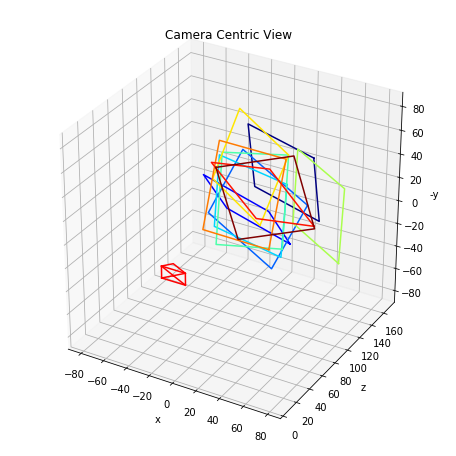

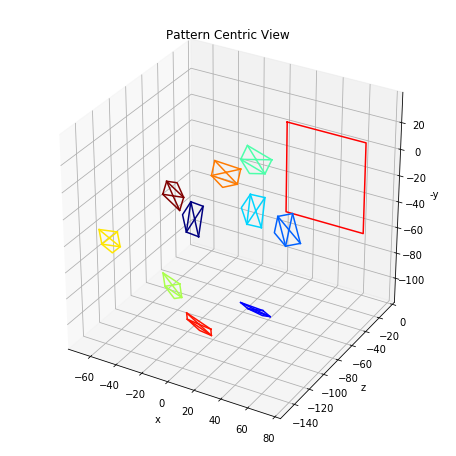

In [13]:
refined_chessboard.visualize_calibration_boards(cam_width=10,cam_height=5)

In [14]:
Results

{'distortion_coefficients': array([[ -2.92971622e-01,   1.07706883e-01,   1.31038412e-03,
          -3.11032204e-05,   4.34799808e-02]]),
 'intrinsic_matrix': array([[ 534.07088318,    0.        ,  341.53407683],
        [   0.        ,  534.11914504,  232.94565267],
        [   0.        ,    0.        ,    1.        ]]),
 'rms': 0.1553690201596684}

In [15]:
refined_results

{'distortion_coefficients': array([[ -2.90115084e-01,   8.92425212e-02,   1.26457414e-03,
          -1.22533334e-04,   8.20695322e-02]]),
 'intrinsic_matrix': array([[ 533.93162827,    0.        ,  340.57452614],
        [   0.        ,  533.93274273,  232.26222773],
        [   0.        ,    0.        ,    1.        ]]),
 'rms': 0.1490723743108263}